# Preamble

Title: *A Comparison of Neighborhoods in the Denver Metro Area (2020)*

Author: *Thyago Mota*

Email: *tmota at msudenver.edu*

Last Update: *2021-09-16*

# Introduction

This report presents a similarity analysis of neighborhoods in the Denver metropolitan area in 2020. Data for this report was obtained from information published by the 5280 Magazine. 


# Dataset

The dataset for this report was built from informaton published by the 5280 Magazine at [https://www.5280.com/neighborhoods/](https://www.5280.com/neighborhoods/). Web scraping techniques were employed to extract the following information from a compilation of 25 neighborhoods:

* population
* average home prices
* average school scores
* crime rank index (from info gathered by the Denver Police Department)
* x factor (a 1-10 score that accounts for things such as access to open space, nearby public transportation, and the prevalence of restaurants and shops)

The script below automatically extracts neighborhood data, saving it in a CSV file (denver_neighborhoods.csv) with the following structure: 

```
name,population,home_price,schools_score,crime_rank,x_factor
Hilltop,9524,1420148,4.3,7,8.0
Country Club,3032,1763760,3.4,11,8.0
...
```

In [1]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Activity 11: a simple scraper

from google.colab import drive
import csv 
import re 
import os
import requests
from bs4 import BeautifulSoup

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/denver_neighborhoods'
CSV_FILE_NAME = 'denver_neighborhoods.csv'
BASE_URL = 'https://www.5280.com/neighborhoods/'
HEADERS = {"User-Agent": "Mozilla/5.0 (X11; CrOS x86_64 12871.102.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.141 Safari/537.36"}

def remove_tags(s): 
    tag = re.compile('<.*?>')
    return re.sub(tag, '', s)

# Google drive mount
drive.mount('/content/drive')

# TODO: finish the scraper
if __name__ == "__main__":

    with open(os.path.join(DATA_FOLDER, CSV_FILE_NAME), 'wt') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(['name','population','home_price','schools_score','crime_rank','x_factor'])
        content = requests.get(BASE_URL, headers=HEADERS).content
        soup = BeautifulSoup(content, 'html.parser')
        trs = soup.find_all('tr')
        for tr in trs:
            row = []
            tds = tr.find_all('td')
            if len(tds) == 0:
                continue
            a = tds[0].find('a')
            row.append(a.contents[0].strip())
            pop = tds[2].contents[0]
            pop = re.sub(',', '', pop)
            row.append(int(pop))
            price = tds[3].contents[0]
            price = re.sub('[$,]', '', price)
            row.append(int(price))
            school = tds[6].contents[0]
            row.append(float(school))
            crime = tds[7].contents[0]
            row.append(int(crime))
            xfactor = tds[8].contents[0]
            row.append(float(xfactor))
            writer.writerow(row)


Mounted at /content/drive


# Summary Statistics

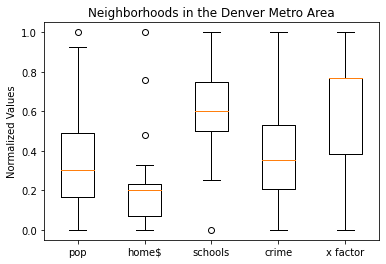

In [26]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Activity 11: summary statistics

from google.colab import drive
import csv 
import os
import matplotlib.pyplot as plt 

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/denver_neighborhoods'
CSV_FILE_NAME = 'denver_neighborhoods.csv'

# Google drive mount
# drive.mount('/content/drive')

def min_max(data, mins, maxs, interval=(0,1)):
  return [ (v - mins) / (maxs - mins) * (interval[1] - interval[0]) + interval[0] for v in data]

# TODO: finish the scraper
if __name__ == "__main__":

    attributes = [[], [], [], [], []]
    with open(os.path.join(DATA_FOLDER, CSV_FILE_NAME), 'rt') as csv_file:
        reader = csv.reader(csv_file)
        row_count = 0
        for row in reader:
            row_count += 1
            if row_count == 1:
                continue
            row[0] = re.sub('Washington', 'Was.', row[0])
            row[0] = re.sub('South', 'S.', row[0])
            neighborhoods.append(row[0])
            attributes[0].append(int(row[1]))
            attributes[1].append(int(row[2]))
            attributes[2].append(float(row[3]))
            attributes[3].append(int(row[4]))
            attributes[4].append(float(row[5]))

    # normalizing attributes
    mins = [ min(x) for x in attributes ] 
    maxs = [ max(x) for x in attributes ]
    attributes = [ min_max(attributes[i], mins[i], maxs[i]) for i in range(5) ]
    axes = plt.gca()
    axes.set_xticklabels(['pop', 'home$', 'schools', 'crime', 'x factor'])
    plt.boxplot(attributes)
    plt.title('Neighborhoods in the Denver Metro Area')
    plt.ylabel('Normalized Values')
    plt.show()


In [27]:
# CS390Z - Introduction to Data Minining - Fall 2021
# Instructor: Thyago Mota
# Description: Activity 11: similarity analysis of neighborhoods in the Denver metro area

import csv 
import re 
import os
import math
import matplotlib.pyplot as plt 
from matplotlib import cm as cm

# definitions/parameters
DATA_FOLDER = '/content/drive/MyDrive/Colab Datasets/denver_neighborhoods'
CSV_FILE_NAME = 'denver_neighborhoods.csv'

def min_max(data, mins, maxs, interval=(0,1)):
    return [ int(((data[i] - mins[i]) / (maxs[i] - mins[i]) * (interval[1] - interval[0]) + interval[0]) * 100000) / 100000 for i in range(len(data))]

def eucl_dist(a, b): 
    sum = 0
    for i in range(len(a)):
        sum += (a[i] - b[i])**2
    return int((1 - math.sqrt(sum / len(a))) * 100000) / 100000

# TODO: finish the similarity analysis
if __name__ == "__main__":

    neighborhoods = []
    matrix = []
    with open(os.path.join(DATA_FOLDER, CSV_FILE_NAME), 'rt') as csv_file:
        reader = csv.reader(csv_file)
        row_count = 0
        for row in reader:
            row_count += 1
            if row_count == 1:
                continue
            row[0] = re.sub('Washington', 'Was.', row[0])
            row[0] = re.sub('South', 'S.', row[0])
            neighborhoods.append(row[0])
            data = [ int(row[1]), int(row[2]), float(row[3]), int(row[4]), float(row[5])]
            if row_count == 2:
                mins = list(data)
                maxs = list(data)
            else:
                for i in range(len(data)):
                    mins[i] = min(mins[i], data[i])
                    maxs[i] = max(maxs[i], data[i])
            matrix.append(data)
    print(mins)
    print(maxs)
    matrix = [ min_max(data, mins, maxs) for data in matrix ]
    print(matrix)
    

[3032, 347675, 1.0, 1, 3.0]
[20182, 1763760, 5.0, 69, 9.5]
[[0.37854, 0.75735, 0.825, 0.08823, 0.76923], [0.0, 1.0, 0.6, 0.14705, 0.76923], [0.37982, 0.27396, 0.825, 0.11764, 0.76923], [0.2779, 0.24738, 0.5, 0.38235, 0.92307], [0.16571, 0.32767, 0.75, 0.63235, 0.76923], [0.26134, 0.47778, 0.5, 0.10294, 1.0], [0.4923, 0.20922, 0.625, 0.22058, 0.92307], [0.02874, 0.20745, 1.0, 0.0, 0.46153], [0.30069, 0.23119, 0.625, 0.32352, 0.76923], [0.0376, 0.21479, 0.5, 0.72058, 0.84615], [0.36268, 0.23049, 0.625, 0.5, 0.84615], [0.92664, 0.17241, 0.57499, 1.0, 1.0], [0.27498, 0.01816, 0.5, 0.48529, 0.76923], [0.13451, 0.20206, 0.5, 0.94117, 0.76923], [0.29877, 0.18934, 0.5, 0.35294, 0.46153], [0.36157, 0.03959, 0.75, 0.58823, 0.23076], [0.38518, 0.068, 0.75, 0.20588, 0.15384], [1.0, 0.05665, 0.57499, 0.52941, 0.30769], [0.68577, 0.09664, 0.65, 0.27941, 0.38461], [0.15784, 0.21877, 0.5, 0.66176, 0.38461], [0.18151, 0.02486, 0.75, 0.16176, 0.0], [0.60093, 0.0606, 0.425, 0.23529, 0.30769], [0.02903, 0